In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv('../DATA/lending_club_loan_two.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


Exploratory Data Analysis

In [4]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [7]:
df[['emp_title','emp_length','title']]

,emp_title,emp_length,title
0,Marketing,10+ years,Vacation
1,Credit analyst,4 years,Debt consolidation
2,Statistician,< 1 year,Credit card refinancing
3,Client Advocate,6 years,Credit card refinancing
4,Destiny Management Inc.,9 years,Credit Card Refinance
...,...,...,...
396025,licensed bankere,2 years,Debt consolidation
396026,Agent,5 years,Debt consolidation
396027,City Carrier,10+ years,pay off credit cards
396028,"Gracon Services, Inc",10+ years,Loanforpayoff


<AxesSubplot: xlabel='loan_status', ylabel='count'>

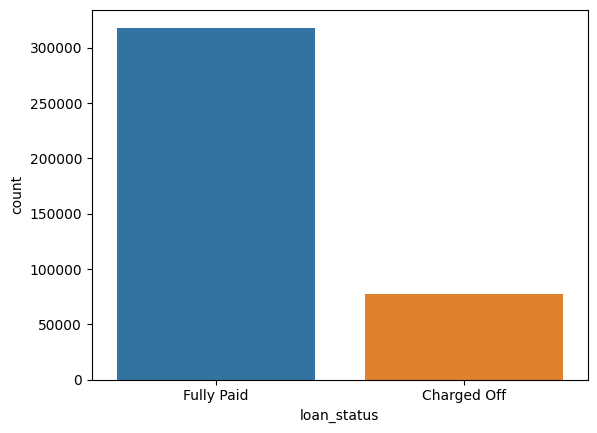

In [8]:
sns.countplot(x='loan_status', data=df)

<AxesSubplot: xlabel='loan_amnt', ylabel='Count'>

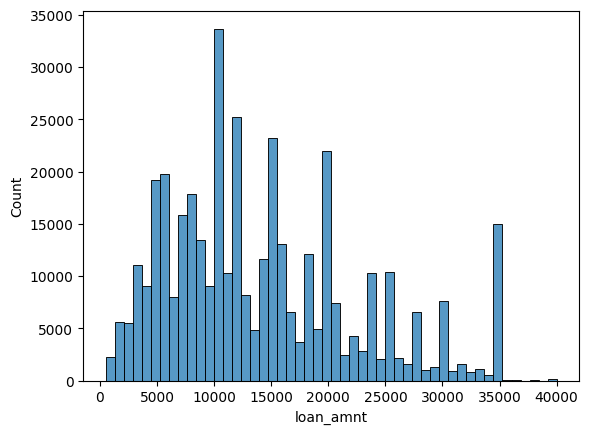

In [10]:
sns.histplot(x='loan_amnt', data=df, bins=50)

In [12]:
df.corr()

C:\Users\dell\AppData\Local\Temp\ipykernel_6568\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


C:\Users\dell\AppData\Local\Temp\ipykernel_6568\184493931.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='viridis')


<AxesSubplot: >

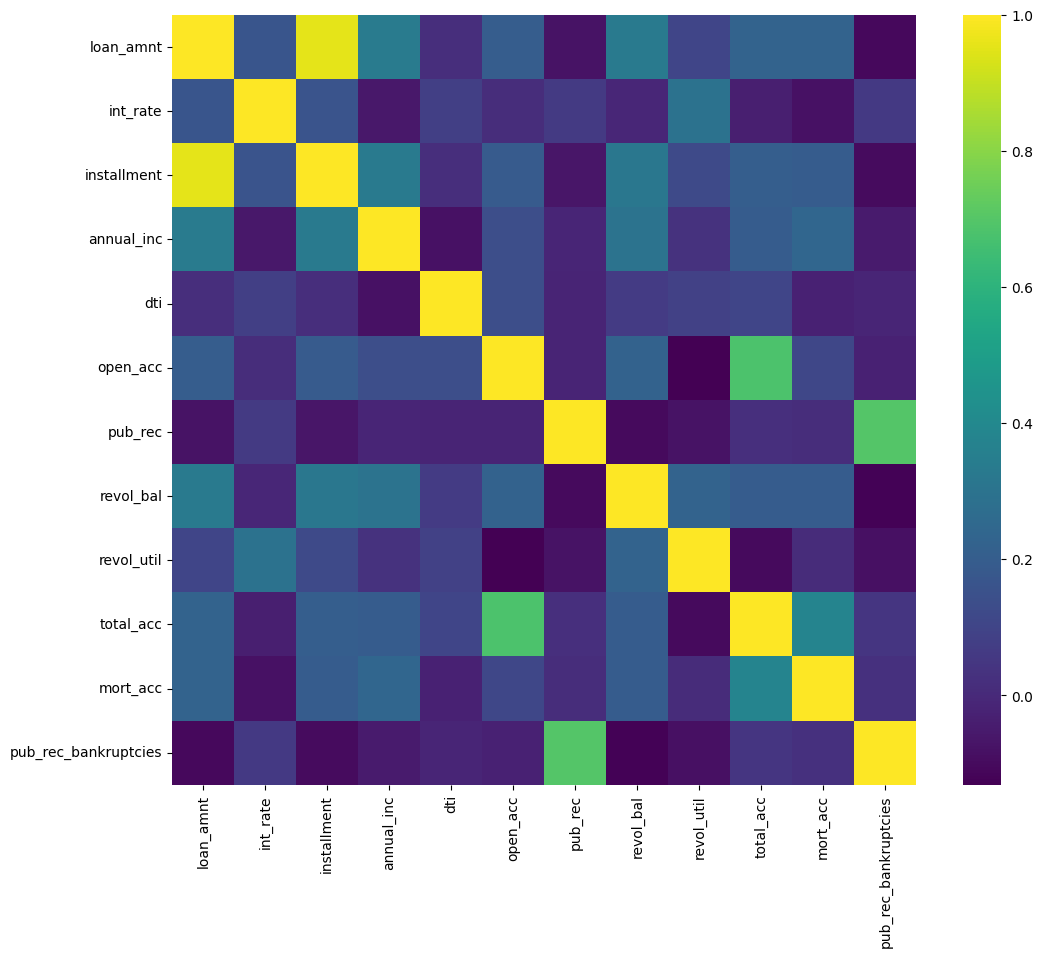

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='viridis')

<AxesSubplot: xlabel='installment', ylabel='loan_amnt'>

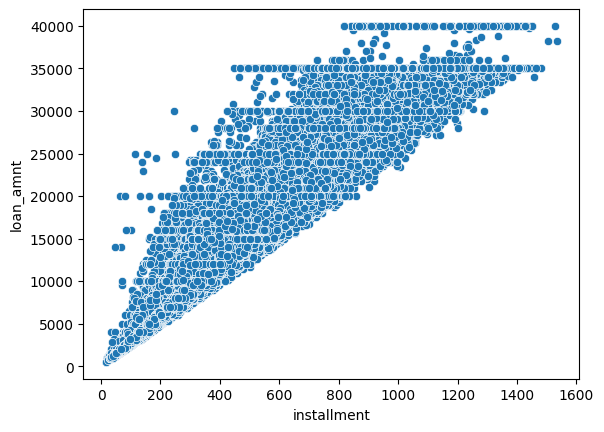

In [15]:
sns.scatterplot(x='installment', y='loan_amnt', data=df)

<AxesSubplot: xlabel='loan_status', ylabel='loan_amnt'>

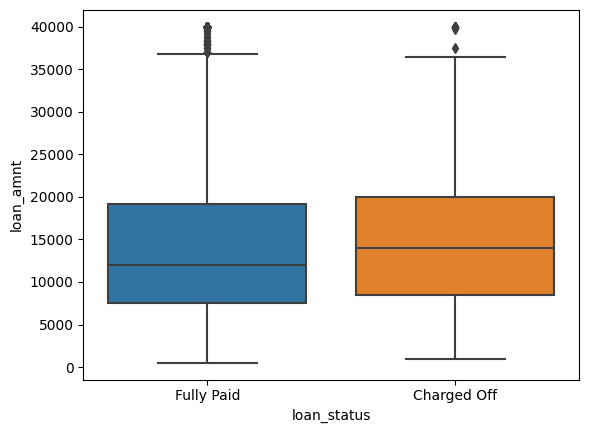

In [16]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df)

In [17]:
#unique possible grade and sub-grade
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [18]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

<AxesSubplot: xlabel='grade', ylabel='count'>

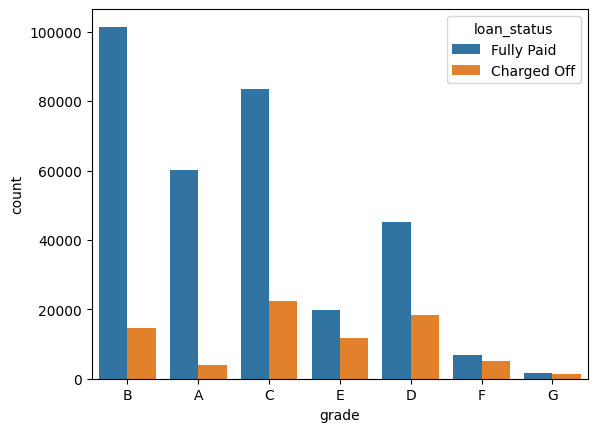

In [19]:
sns.countplot(x='grade', data=df, hue='loan_status')

<AxesSubplot: ylabel='count'>

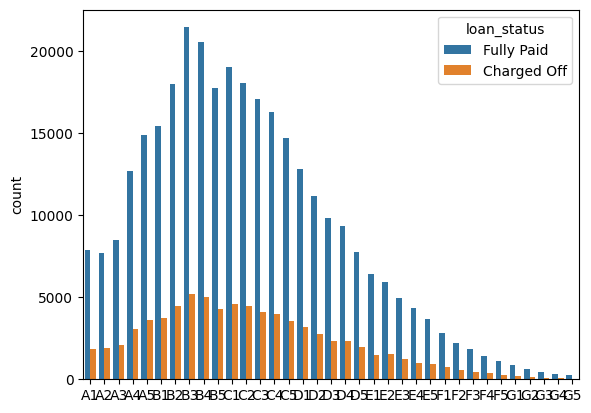

In [20]:
ordered_subgrade=sorted(df['sub_grade'])
sns.countplot(x=ordered_subgrade, data=df, hue='loan_status')

In [22]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [23]:
df['loan_repaid']= df['loan_status'].apply(lambda x: 1 if x=='Fully Paid' else 0)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0


C:\Users\dell\AppData\Local\Temp\ipykernel_6568\660239616.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')


<AxesSubplot: >

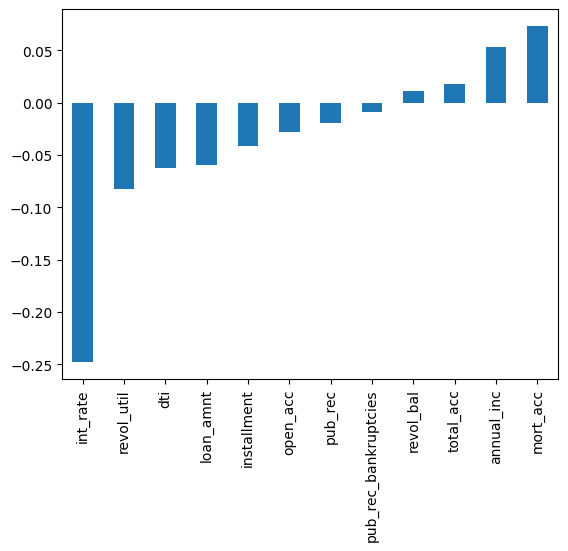

In [24]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

Data Preprocessing

In [25]:
#what %age of data is missing in each column
100*df.isna().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [27]:
#there're too many emp_title to try to convert them into dummy variables -> df['emp_title'].nunique()
#so we'll just drop that column
df.drop('emp_title', axis=1, inplace=True)


<AxesSubplot: xlabel='emp_length', ylabel='count'>

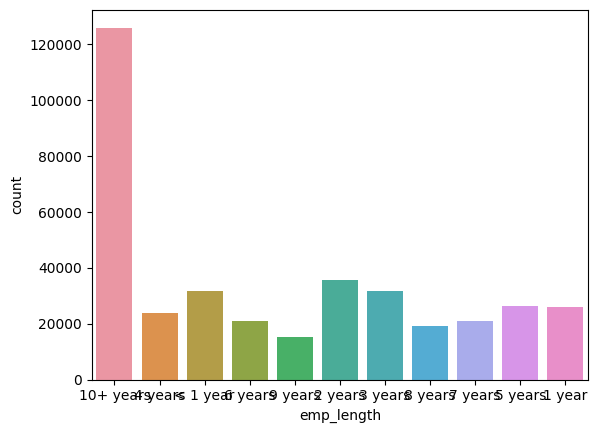

In [30]:
#countplot of emp_length column

sns.countplot(x=df['emp_length'], data=df)

<AxesSubplot: xlabel='emp_length', ylabel='count'>

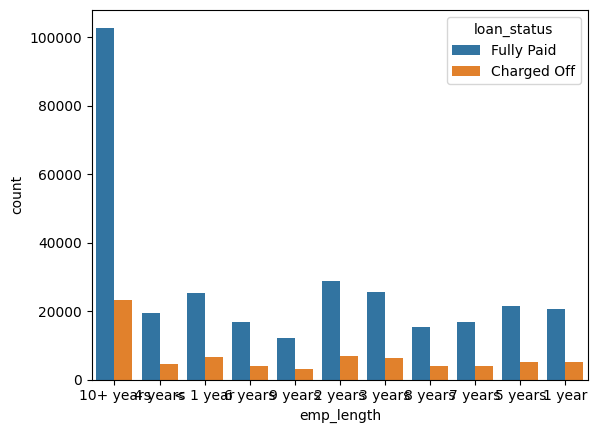

In [31]:
sns.countplot(x=df['emp_length'], data=df, hue='loan_status')

In [33]:
emp_co= df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']
emp_fp= df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']

In [34]:
emp_len= emp_co/emp_fp
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

<AxesSubplot: xlabel='emp_length'>

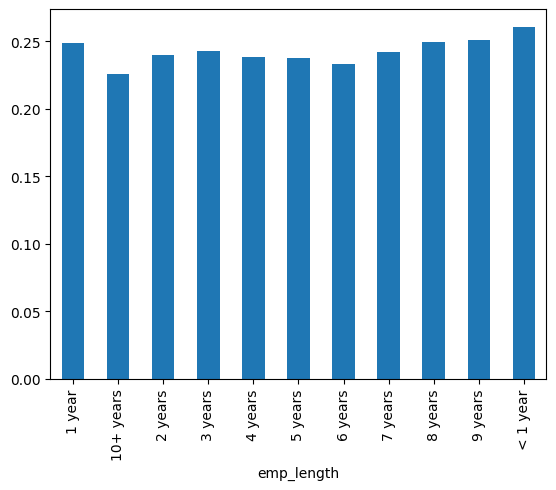

In [35]:
emp_len.plot(kind='bar')

In [36]:
df.drop('emp_length',axis=1, inplace=True)

In [37]:
df.drop('title', axis=1, inplace=True)

In [38]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [39]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [40]:
#to fill the 'mort_acc' column, we'll first see its correlation with other columns
df.corr()['mort_acc']

C:\Users\dell\AppData\Local\Temp\ipykernel_6568\303032410.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['mort_acc']


loan_amnt               0.222315
int_rate               -0.082583
installment             0.193694
annual_inc              0.236320
dti                    -0.025439
open_acc                0.109205
pub_rec                 0.011552
revol_bal               0.194925
revol_util              0.007514
total_acc               0.381072
mort_acc                1.000000
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
Name: mort_acc, dtype: float64

In [44]:
total_acc_avg= df.groupby('total_acc').mean()['mort_acc']

C:\Users\dell\AppData\Local\Temp\ipykernel_6568\3894669950.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_acc_avg= df.groupby('total_acc').mean()['mort_acc']


In [49]:
total_acc_avg[2.0]

0.0

In [50]:
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [51]:
df['mort_acc']= df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [52]:
df.isna().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [53]:
df= df.dropna()

In [54]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [56]:
df.select_dtypes('object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [57]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [58]:
df['term']=df['term'].apply(lambda x: int(x[:3]))

In [59]:
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

In [60]:
df['grade'].value_counts()

B    115812
C    105775
A     64056
D     63364
E     31427
F     11740
G      3045
Name: grade, dtype: int64

In [61]:
df.drop('grade', axis=1, inplace=True)

In [62]:
subgrade_dummies= pd.get_dummies(data=df['sub_grade'], drop_first=True)

In [63]:
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36,10.49,506.97,B3,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36,6.49,220.65,A2,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0


In [67]:
df=pd.concat([df.drop('sub_grade', axis=1), subgrade_dummies], axis=1)

In [68]:
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,...,0,0,0,0,0,0,0,0,0,0


In [71]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [72]:
df.select_dtypes('object').columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [74]:
df['verification_status'].value_counts()

Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64

In [81]:
dummies= pd.get_dummies(['verification_status', 'initial_list_status','application_type', 'purpose'],drop_first=True)
df= pd.concat([df.drop([ 'verification_status', 'initial_list_status','application_type', 'purpose'],axis=1),dummies], axis=1)


In [82]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'initial_list_status', 'purpose', 'verification_status'],
      dtype='object')

In [83]:
df.select_dtypes('object').columns

Index(['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

In [84]:
df=df.drop(['address'], axis=1)

In [86]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'ANY', 'NONE'], dtype=object)

In [87]:
def home_owner_ftn(ownership):
    if ownership in ['OTHER', 'ANY', 'NONE']:
        return 'OTHER'
    else:
        return ownership

In [88]:
df['home_ownership']= df['home_ownership'].apply(home_owner_ftn)
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER'], dtype=object)

In [89]:
dummies= pd.get_dummies(data=df['home_ownership'], drop_first=True)
df=pd.concat([df.drop('home_ownership', axis=1), dummies],axis=1)

In [90]:
df.select_dtypes('object').columns

Index(['issue_d', 'loan_status', 'earliest_cr_line'], dtype='object')

In [91]:
df= df.drop('issue_d', axis=1)

In [93]:
df['earliest_cr_year']= df['earliest_cr_line'].apply(lambda x: int(x[-4:]))
df=df.drop('earliest_cr_line', axis=1)

In [92]:
df['earliest_cr_line'].head()

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

In [94]:
df.select_dtypes('object').columns

Index(['loan_status'], dtype='object')

In [96]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'initial_list_status',
       'purpose', 'verification_status', 'OTHER', 'OWN', 'RENT',
       'earliest_cr_year'],
      dtype='object')

Train Test Split

In [147]:
from sklearn.model_selection import train_test_split
X= df.drop('loan_repaid', axis=1)
y= df['loan_repaid']

In [148]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3)

In [149]:
#normalization
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)


In [150]:
#creating the ANN
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

#how to choose the number of neurons in the network
#i/p layer should have equal to the number of features in your data


model = Sequential()
model.add(Dense(78, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(36, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')



In [152]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min')
model.fit(X_train, y_train, epochs=10, batch_size=256, validation_data=(X_test, y_test))

Epoch 1/10
1081/1081 [==============================] - 9s 7ms/step - loss: 0.4772 - val_loss: 0.4560
Epoch 2/10
1081/1081 [==============================] - 7s 6ms/step - loss: 0.4605 - val_loss: 0.4528
Epoch 3/10
1081/1081 [==============================] - 7s 6ms/step - loss: 0.4567 - val_loss: 0.4529
Epoch 4/10
1081/1081 [==============================] - 7s 6ms/step - loss: 0.4554 - val_loss: 0.4506
Epoch 5/10
1081/1081 [==============================] - 7s 7ms/step - loss: 0.4548 - val_loss: 0.4509
Epoch 6/10
1081/1081 [==============================] - 7s 7ms/step - loss: 0.4536 - val_loss: 0.4501
Epoch 7/10
1081/1081 [==============================] - 7s 7ms/step - loss: 0.4531 - val_loss: 0.4499
Epoch 8/10
1081/1081 [==============================] - 7s 7ms/step - loss: 0.4524 - val_loss: 0.4486
Epoch 9/10
1081/1081 [==============================] - 8s 7ms/step - loss: 0.4525 - val_loss: 0.4486
Epoch 10/10
1081/1081 [==============================] - 7s 7ms/step - loss: 0.452

In [151]:
print(np.any(np.isnan(X_train)))
print(np.any(np.isnan(y_train)))

False
False


<AxesSubplot: >

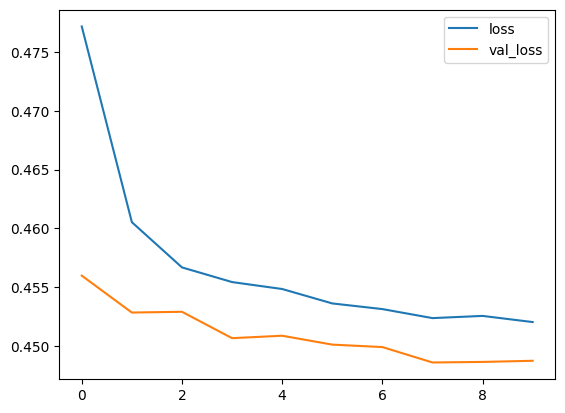

In [153]:
metrics_df=pd.DataFrame(model.history.history)
metrics_df.plot()

In [164]:
preds= model.predict(X_test)
preds= preds.reshape(118566,)
preds=pd.Series(preds)
preds=preds.apply(lambda x:1 if x>0.5 else 0)

3706/3706 [==============================] - 9s 2ms/step


In [165]:
from sklearn.metrics import classification_report
print(classification_report(y_test.values,preds))

              precision    recall  f1-score   support

           0       0.57      0.01      0.02     23173
           1       0.81      1.00      0.89     95393

    accuracy                           0.81    118566
   macro avg       0.69      0.50      0.46    118566
weighted avg       0.76      0.81      0.72    118566



In [159]:
y_test.values

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [163]:
preds.reshape(118566,)

array([0.790705 , 0.7413687, 0.9340475, ..., 0.516478 , 0.913713 ,
       0.8383066], dtype=float32)